En el apartado "Loading Data" de esta URL:

https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

Se explica cómo se cargan una serie de datos: 

1. Utiliza esa misma forma para cargar los datos.
2. Limpia los datos si es necesario
3. Dibuja con plotly los que creas necesarios gráficos para entender los datos.
4. Utiliza los métodos de clasificación vistos hasta ahora para clasificar el target de los datos, ¿cuál da mejores resultados? 
5. Intenta superarte en el score cambiando las features de los algoritmos.

### First import the libraries we use to transform the data and make the model

In [72]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(8,8));
pd.options.plotting.backend = "plotly"
sns.set(rc={'figure.figsize':(6,6)})
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier 
from sklearn.ensemble import RandomForestClassifier 





<Figure size 576x576 with 0 Axes>

## Import data

In [2]:
cancer = datasets.load_breast_cancer()

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

### Explore de data set

In [4]:
print(cancer['DESCR'])


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [46]:
cancer.feature_names
columns = [col.replace(' ','_') for col in cancer.feature_names]
columns


['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_smoothness',
 'mean_compactness',
 'mean_concavity',
 'mean_concave_points',
 'mean_symmetry',
 'mean_fractal_dimension',
 'radius_error',
 'texture_error',
 'perimeter_error',
 'area_error',
 'smoothness_error',
 'compactness_error',
 'concavity_error',
 'concave_points_error',
 'symmetry_error',
 'fractal_dimension_error',
 'worst_radius',
 'worst_texture',
 'worst_perimeter',
 'worst_area',
 'worst_smoothness',
 'worst_compactness',
 'worst_concavity',
 'worst_concave_points',
 'worst_symmetry',
 'worst_fractal_dimension']

In [47]:
df = pd.DataFrame(cancer.data, columns=columns)
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [48]:
# print the cancer labels (0:malignant, 1:benign)
y = cancer.target

### Split the data set choosing the columns that i use to train de model and the target

In [49]:
df['target'] = y

In [50]:
X = df.drop([
 'mean_perimeter',
 'mean_area',
 'mean_smoothness',
 'mean_compactness',
 'mean_concavity',
 'mean_concave_points',
 'mean_fractal_dimension',
 'radius_error',
 'texture_error',
 'perimeter_error',
 'area_error',
 'smoothness_error',
 'compactness_error',
 'concavity_error',
 'concave_points_error',
 'symmetry_error',
 'fractal_dimension_error',
 'worst_radius',
 'worst_texture',
 'worst_perimeter',
 'worst_area',
 'worst_smoothness',
 'worst_compactness',
 'worst_concavity',
 'worst_concave_points',
 'worst_symmetry',
 'worst_fractal_dimension',
 'target'], axis=1)
y = df.target
X

,mean_radius,mean_texture,mean_symmetry
0,17.99,10.38,0.2419
1,20.57,17.77,0.1812
2,19.69,21.25,0.2069
3,11.42,20.38,0.2597
4,20.29,14.34,0.1809
...,...,...,...
564,21.56,22.39,0.1726
565,20.13,28.25,0.1752
566,16.60,28.08,0.1590
567,20.60,29.33,0.2397


In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mean_radius    569 non-null    float64
 1   mean_texture   569 non-null    float64
 2   mean_symmetry  569 non-null    float64
dtypes: float64(3)
memory usage: 13.5 KB


### With this simple plot we can see that without do nothing, have a simple classificator, but let do it with a ML model

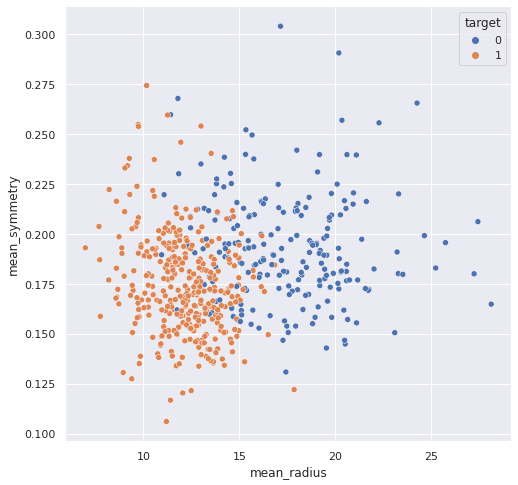

In [52]:
sns.scatterplot(x=X.mean_radius, y=X.mean_symmetry, hue=y);

In [53]:
smote = SMOTE()

In [54]:
pd.DataFrame(y).value_counts()

target
1         357
0         212
dtype: int64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25 , random_state=42, stratify=y)

In [56]:
X_train.shape, X_test.shape

((426, 3), (143, 3))

## Models

For this case i only choose two types of models

In [73]:

rf = RandomForestClassifier(n_estimators=300, verbose=1)
lgbm = LGBMClassifier(verbose=0)

models = [rf, lgbm]



[CV] warm_start=True, n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=73, criterion=entropy, bootstrap=True 
[CV]  warm_start=True, n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=73, criterion=entropy, bootstrap=True, score=0.966, total=   1.0s
[CV] warm_start=False, n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=73, criterion=entropy, bootstrap=True 
[CV]  warm_start=False, n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=73, criterion=entropy, bootstrap=True, score=0.981, total=   1.0s
[CV] warm_start=False, n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=31, criterion=gini, bootstrap=True 
[CV]  warm_start=False, n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=31, criterion=gini, bootstrap=True, score=0.982, total=   2.2s
[CV] warm_start=False,

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:    0.2s finished


[CV] warm_start=False, n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=73, criterion=gini, bootstrap=True 
[CV]  warm_start=False, n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=73, criterion=gini, bootstrap=True, score=0.982, total=   1.2s
[CV] warm_start=False, n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=52, criterion=entropy, bootstrap=False 
[CV]  warm_start=False, n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=52, criterion=entropy, bootstrap=False, score=0.981, total=   1.1s
[CV] warm_start=True, n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=73, criterion=entropy, bootstrap=True 
[CV]  warm_start=True, n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=73, criterion=entropy, bootstrap=True, score=0.981, total=   1.0s
[CV] warm_start=False,

[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]

[CV] warm_start=True, n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=94, criterion=gini, bootstrap=False 
[CV]  warm_start=True, n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=94, criterion=gini, bootstrap=False, score=0.984, total=   1.0s
[CV] warm_start=True, n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=136, criterion=entropy, bootstrap=False 
[CV]  warm_start=True, n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=136, criterion=entropy, bootstrap=False, score=0.985, total=   0.8s
[CV] warm_start=True, n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=136, criterion=gini, bootstrap=True 
[CV]  warm_start=True, n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=136, criterion=gini, bootstrap=True, score=0.983, total=   0.6s
[CV] warm_start=False, n_e

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:    0.2s finished
[Parallel(n_jobs

[CV] warm_start=False, n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=94, criterion=entropy, bootstrap=False 
[CV]  warm_start=False, n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=94, criterion=entropy, bootstrap=False, score=0.976, total=   0.8s
[CV] warm_start=True, n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=136, criterion=entropy, bootstrap=True 
[CV]  warm_start=True, n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=136, criterion=entropy, bootstrap=True, score=0.983, total=   2.0s
[CV] warm_start=False, n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=136, criterion=gini, bootstrap=True 
[CV]  warm_start=False, n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=136, criterion=gini, bootstrap=True, score=0.997, total=   0.3s
[CV] warm_start=

[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1

[CV] warm_start=True, n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=136, criterion=gini, bootstrap=True 
[CV]  warm_start=True, n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=136, criterion=gini, bootstrap=True, score=0.966, total=   0.7s
[CV] warm_start=False, n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=52, criterion=gini, bootstrap=True 
[CV]  warm_start=False, n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=52, criterion=gini, bootstrap=True, score=0.984, total=   2.8s
[CV] warm_start=True, n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=94, criterion=entropy, bootstrap=True 
[CV]  warm_start=True, n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=94, criterion=entropy, bootstrap=True, score=0.964, total=   2.6s
[CV] warm_start=True, n_es

[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_

[CV] warm_start=False, n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=94, criterion=entropy, bootstrap=True 
[CV]  warm_start=False, n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=94, criterion=entropy, bootstrap=True, score=0.983, total=   1.0s
[CV] warm_start=True, n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=136, criterion=entropy, bootstrap=True 
[CV]  warm_start=True, n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=136, criterion=entropy, bootstrap=True, score=0.982, total=   1.9s
[CV] warm_start=True, n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=115, criterion=gini, bootstrap=False 
[CV]  warm_start=True, n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=115, criterion=gini, bootstrap=False, score=0.962, total=   0.5s
[CV] warm_start=Fa

[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:    0.1s finished
[Parallel(n_jobs=1

[CV] warm_start=True, n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=94, criterion=gini, bootstrap=False 
[CV]  warm_start=True, n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=94, criterion=gini, bootstrap=False, score=0.964, total=   1.1s
[CV] warm_start=True, n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=136, criterion=entropy, bootstrap=False 
[CV]  warm_start=True, n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=136, criterion=entropy, bootstrap=False, score=0.983, total=   0.8s
[CV] warm_start=False, n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=94, criterion=entropy, bootstrap=False 
[CV]  warm_start=False, n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=94, criterion=entropy, bootstrap=False, score=0.981, total=   0.8s
[CV] warm_start=Tr

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[CV] warm_start=False, n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=73, criterion=entropy, bootstrap=True 
[CV]  warm_start=False, n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=73, criterion=entropy, bootstrap=True, score=0.966, total=   1.0s
[CV] warm_start=True, n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=94, criterion=gini, bootstrap=False 
[CV]  warm_start=True, n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=94, criterion=gini, bootstrap=False, score=0.984, total=   1.0s
[CV] warm_start=False, n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=94, criterion=entropy, bootstrap=True 
[CV]  warm_start=False, n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=94, criterion=entropy, bootstrap=True, score=0.982, total=   1.0s
[CV] warm_start=False,

Entrenando RandomForestCl ........



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Modelo entrenado :)

Vamos al lio........

-----------Matriz Confusión RandomForestCl ---------------------------



[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


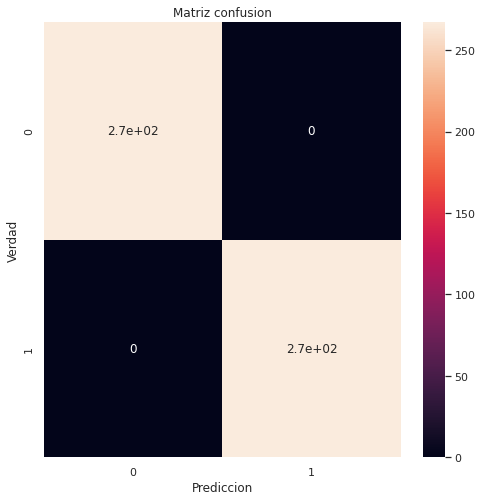

-----------Resultados para el modelo RandomForestCl-----------

Accuracy: 1.0
Precision score: 1.0
f_1 score: 1.0
Recall score: 1.0
--------------------------------------------------------

-----------Matriz Confusión All RandomForestCl ------------------------



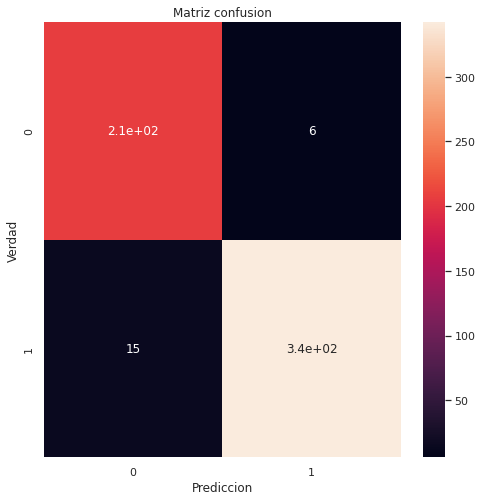

-----------Resultados para el modelo completo RandomForestCl-----------

Accuracy: 0.9630931458699473
Precision score: 0.9574426587611171
f_1 score: 0.9608569603459289
Recall score: 0.9648406532424291
--------------------------------------------------------

Entrenando LGBMClassifier ........

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

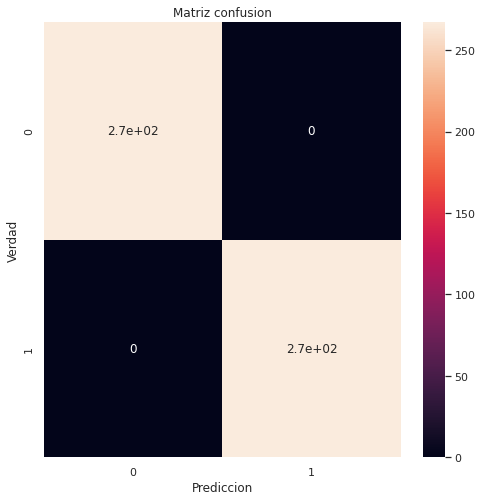

-----------Resultados para el modelo LGBMClassifier-----------

Accuracy: 1.0
Precision score: 1.0
f_1 score: 1.0
Recall score: 1.0
--------------------------------------------------------

-----------Matriz Confusión All LGBMClassifier ------------------------



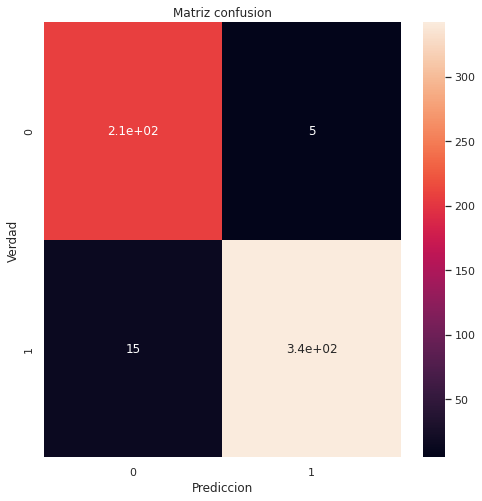

-----------Resultados para el modelo completo LGBMClassifier-----------

Accuracy: 0.9648506151142355
Precision score: 0.9590116052652076
f_1 score: 0.9627539798910767
Recall score: 0.9671991438084668
--------------------------------------------------------



In [71]:
for model in models:
    
    X_train,y_train = smote.fit_resample(X_train, y_train)
    
    name = str(model)[:14]
    
    print(f'Entrenando {name} ........\n')
    model.fit(X_train, y_train)

    print('Modelo entrenado :)\n')
    print('Vamos al lio........\n')
    model_pred = model.predict(X_train)
    acc_model = accuracy_score(y_train, model_pred)
    ps_model = precision_score(y_train, model_pred, average='macro')
    f1_model = f1_score(y_train, model_pred, average='macro')
    rs_model = recall_score(y_train, model_pred, average='macro')
    cm_model = confusion_matrix(y_train, model_pred)
    pred = model.predict(X)
    acc_model_all = accuracy_score(y, pred)
    ps_model_all = precision_score(y, pred, average='macro')
    f1_model_all = f1_score(y, pred, average='macro')
    rs_model_all = recall_score(y, pred, average='macro')
    cm_model_all = confusion_matrix(y, pred)
    
    print(f'-----------Matriz Confusión {name} ---------------------------\n')
    sns.heatmap(cm_model, annot=True)
    sns.set(rc={'figure.figsize':(8,8)})
    plt.title('Matriz confusion')
    plt.ylabel('Verdad')
    plt.xlabel('Prediccion')
    plt.show();
    
    print(f'-----------Resultados para el modelo {name}-----------\n')
    print(f'Accuracy: {acc_model}')
    print(f'Precision score: {ps_model}')
    print(f'f_1 score: {f1_model}')
    print(f'Recall score: {rs_model}')
    print('--------------------------------------------------------\n')
    
    print(f'-----------Matriz Confusión All {name} ------------------------\n')
    
    sns.heatmap(cm_model_all, annot=True)
    sns.set(rc={'figure.figsize':(8,8)})
    plt.title('Matriz confusion')
    plt.ylabel('Verdad')
    plt.xlabel('Prediccion')
    plt.show();
    
    
    
    print(f'-----------Resultados para el modelo completo {name}-----------\n')
    print(f'Accuracy: {acc_model_all}')
    print(f'Precision score: {ps_model_all}')
    print(f'f_1 score: {f1_model_all}')
    print(f'Recall score: {rs_model_all}')
    print('--------------------------------------------------------\n')

## Now we can to finish our model with Random Grid Search, looking for better accuracy


In [59]:
from sklearn.model_selection import RandomizedSearchCV

In [60]:
n_estimators=[int(x) for x in np.linspace(200, 2000, 10)]

criterion = ['gini', 'entropy']

max_depth = [int(x) for x in np.linspace(10, 200, 10)]

min_samples_split = [int(x) for x in np.linspace(2, 10, 1)]

min_samples_leaf = [int(x) for x in np.linspace(1, 10, 1)]

max_features = ['auto', 'sqrt', 'log2']

bootstrap = [True, False]

warm_start = [True, False]

In [61]:
random_grid={'n_estimators': n_estimators,
             'criterion': criterion,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'max_features': max_features,
             'bootstrap': bootstrap,
             'warm_start': warm_start,
             }

In [62]:
rf_random=RandomizedSearchCV(estimator=rf,
                             param_distributions=random_grid,
                             n_iter=100,
                             cv=5,
                             verbose=10,
                             n_jobs=-1,
                             scoring='roc_auc')

In [63]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

[CV] warm_start=True, n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=200, criterion=gini, bootstrap=False 
[CV]  warm_start=True, n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=200, criterion=gini, bootstrap=False, score=0.995, total=   2.5s
[CV] warm_start=True, n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=115, criterion=gini, bootstrap=False 
[CV]  warm_start=True, n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=115, criterion=gini, bootstrap=False, score=0.984, total=   1.2s
[CV] warm_start=True, n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=52, criterion=gini, bootstrap=True 
[CV]  warm_start=True, n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=52, criterion=gini, bootstrap=True, score=0.996, total=   2.1s
[CV] warm_start=True, n_es

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

[CV] warm_start=False, n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=115, criterion=entropy, bootstrap=False 
[CV]  warm_start=False, n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=115, criterion=entropy, bootstrap=False, score=0.981, total=   2.1s
[CV] warm_start=False, n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=115, criterion=gini, bootstrap=True 
[CV]  warm_start=False, n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=115, criterion=gini, bootstrap=True, score=0.983, total=   1.8s
[CV] warm_start=True, n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=52, criterion=gini, bootstrap=True 
[CV]  warm_start=True, n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=52, criterion=gini, bootstrap=True, score=0.983, total=   2.2s
[CV] warm_start=Tr

[CV] warm_start=True, n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=200, criterion=gini, bootstrap=False 
[CV]  warm_start=True, n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=200, criterion=gini, bootstrap=False, score=0.979, total=   2.4s
[CV] warm_start=True, n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=115, criterion=gini, bootstrap=False 
[CV]  warm_start=True, n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=115, criterion=gini, bootstrap=False, score=0.995, total=   1.2s
[CV] warm_start=True, n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=52, criterion=gini, bootstrap=True 
[CV]  warm_start=True, n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=52, criterion=gini, bootstrap=True, score=0.981, total=   2.1s
[CV] warm_start=True, n_es

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

[CV] warm_start=False, n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=136, criterion=gini, bootstrap=True 
[CV]  warm_start=False, n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=136, criterion=gini, bootstrap=True, score=0.980, total=   2.7s
[CV] warm_start=False, n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=52, criterion=gini, bootstrap=True 
[CV]  warm_start=False, n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=52, criterion=gini, bootstrap=True, score=0.967, total=   0.3s
[CV] warm_start=False, n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=52, criterion=gini, bootstrap=True 
[CV]  warm_start=False, n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=52, criterion=gini, bootstrap=True, score=0.980, total=   0.3s
[CV] warm_start=True, n_estima

[Parallel(n_jobs=-1)]: Done 389 tasks      | elapsed:   43.4s


[CV] warm_start=False, n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=136, criterion=gini, bootstrap=True 
[CV]  warm_start=False, n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=136, criterion=gini, bootstrap=True, score=0.962, total=   2.6s
[CV] warm_start=False, n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=157, criterion=gini, bootstrap=True 
[CV]  warm_start=False, n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=157, criterion=gini, bootstrap=True, score=0.981, total=   1.8s
[CV] warm_start=True, n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=200, criterion=gini, bootstrap=False 
[CV]  warm_start=True, n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=200, criterion=gini, bootstrap=False, score=0.985, total=   1.5s
[CV] warm_start=False,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

[CV] warm_start=False, n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=136, criterion=gini, bootstrap=True 
[CV]  warm_start=False, n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=136, criterion=gini, bootstrap=True, score=0.981, total=   2.6s
[CV] warm_start=False, n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=157, criterion=gini, bootstrap=True 
[CV]  warm_start=False, n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=157, criterion=gini, bootstrap=True, score=0.983, total=   1.8s
[CV] warm_start=True, n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=178, criterion=gini, bootstrap=False 
[CV]  warm_start=True, n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=178, criterion=gini, bootstrap=False, score=0.980, total=   2.0s
[CV] warm_start=True, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel

[CV] warm_start=False, n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=136, criterion=gini, bootstrap=True 
[CV]  warm_start=False, n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=136, criterion=gini, bootstrap=True, score=0.997, total=   2.6s
[CV] warm_start=False, n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=157, criterion=gini, bootstrap=True 
[CV]  warm_start=False, n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=157, criterion=gini, bootstrap=True, score=0.996, total=   1.8s
[CV] warm_start=True, n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=200, criterion=gini, bootstrap=False 
[CV]  warm_start=True, n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=200, criterion=gini, bootstrap=False, score=0.983, total=   1.5s
[CV] warm_start=False,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

[CV] warm_start=False, n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=115, criterion=entropy, bootstrap=False 
[CV]  warm_start=False, n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=115, criterion=entropy, bootstrap=False, score=0.983, total=   2.1s
[CV] warm_start=True, n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=115, criterion=gini, bootstrap=False 
[CV]  warm_start=True, n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=115, criterion=gini, bootstrap=False, score=0.964, total=   1.2s
[CV] warm_start=True, n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=200, criterion=entropy, bootstrap=True 
[CV]  warm_start=True, n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=200, criterion=entropy, bootstrap=True, score=0.964, total=   3.1s
[CV] warm_

[CV] warm_start=False, n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=115, criterion=entropy, bootstrap=False 
[CV]  warm_start=False, n_estimators=1600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=115, criterion=entropy, bootstrap=False, score=0.980, total=   2.1s
[CV] warm_start=False, n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=115, criterion=gini, bootstrap=True 
[CV]  warm_start=False, n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=115, criterion=gini, bootstrap=True, score=0.997, total=   1.8s
[CV] warm_start=True, n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=52, criterion=gini, bootstrap=True 
[CV]  warm_start=True, n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=52, criterion=gini, bootstrap=True, score=0.980, total=   2.2s
[CV] warm_start=Fa

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

[CV] warm_start=True, n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=200, criterion=gini, bootstrap=False 
[CV]  warm_start=True, n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=200, criterion=gini, bootstrap=False, score=0.985, total=   2.4s
[CV] warm_start=False, n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=157, criterion=gini, bootstrap=True 
[CV]  warm_start=False, n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=157, criterion=gini, bootstrap=True, score=0.980, total=   1.8s
[CV] warm_start=True, n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=200, criterion=gini, bootstrap=False 
[CV]  warm_start=True, n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=200, criterion=gini, bootstrap=False, score=0.966, total=   1.5s
[CV] warm_start=True, 

[Parallel(n_jobs=-1)]: Done 449 tasks      | elapsed:   48.2s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1600 out of 1600 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=300,
                                                    verbose=1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 31, 52, 73, 94, 115,
                                                      136, 157, 178, 200],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [2],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000],
     

In [64]:
rf_random.best_params_

{'warm_start': False,
 'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 200,
 'criterion': 'gini',
 'bootstrap': True}

In [65]:
rf_random.best_score_

0.98242883324763

In [25]:
pred = rf_random.predict(X)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


In [26]:
acc_rf_random_all = accuracy_score(y, pred)
ps_rf_random_all = precision_score(y, pred, average='macro')
f1_rf_random_all = f1_score(y, pred, average='macro')
rs_rf_random_all = recall_score(y, pred, average='macro')
cm_rf_random_all = confusion_matrix(y, pred)

print(f'-----------Resultados para el modelo completo rf_random-----------')
print(f'Accuracy: {acc_rf_random_all}')
print(f'Precision score: {ps_rf_random_all}')
print(f'f_1 score: {f1_rf_random_all}')
print(f'Recall score: {rs_rf_random_all}')
print('--------------------------------------------------------')

-----------Resultados para el modelo completo rf_random-----------
Accuracy: 0.9630931458699473
Precision score: 0.9574426587611171
f_1 score: 0.9608569603459289
Recall score: 0.9648406532424291
--------------------------------------------------------


### Explaining the results of the model

The final model have a 96.3 of accuracy, that's a good accuracy but for me it's not enought because we are working with lifes, so we need to do it better, because that we make another model with 5 variables, trying to improve the results.

But the results are great because our model fails on L2 errors, so it means that our model say to 15 persons that have malignant cancer when they really no, that is 'better' that say a person that he/she don't have malignant cancer when he/she really have.

<AxesSubplot:>

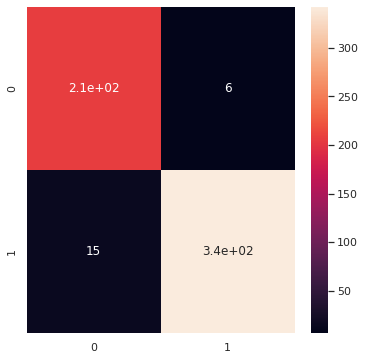

In [81]:
sns.heatmap(cm_rf_random_all, annot=True, )

In [75]:
from mpl_toolkits.mplot3d import Axes3D

/tmp/ipykernel_10092/1636156749.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=fig.gca(projection='3d')


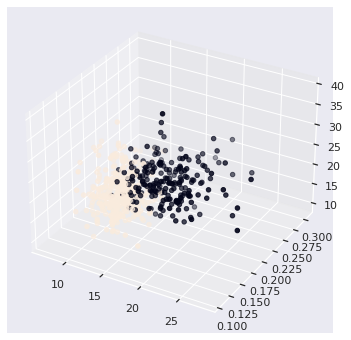

In [76]:
fig=plt.figure()
ax=fig.gca(projection='3d')
ax.scatter3D(X.mean_radius, X.mean_symmetry, X.mean_texture ,c=y)
#ax.plot(x_1, y_1, z_1, color='b')
plt.show();

In [77]:
import ipyvolume as ipv

In [78]:
x_s,y_s,z_s = X.mean_radius, X.mean_symmetry, X.mean_texture

In [79]:
time = np.linspace(0, np.pi*2, 15)
z = np.array([(np.cos(y + t) * np.exp(-y/5)) for t in time])
color = np.array([[np.cos(y + t), 1-np.abs(z[i]), 0.1+z[i]*0] for i, t in enumerate(time)])
size = (z+1)
color = np.transpose(color, (0, 2, 1))
ipv.figure()
s = ipv.scatter(x_s, y_s, z_s, color=color, size=size, marker="sphere")
ipv.animation_control(s, interval=200)
ipv.ylim(-3,3)
ipv.show()

In [80]:
fig = ipv.figure()
color = []
scatter = ipv.scatter(x_s, z_s, y_s)
ipv.show()